In [1]:
import nltk
import numpy as np
from nltk.metrics import *
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
#import pattern3.text.en
from pattern.en import tag
nltk.download('wordnet')
from difflib import SequenceMatcher



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mtool\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Homework 3
### Question 1 
1.	Compare your given name with your nickname (if you don’t have a nickname, invent one for this assignment) by answering the following questions:
  *	What is the edit distance between your nickname and your given name?
  *	What is the percentage string match between your nickname and your given name?


In [2]:
givenName = 'Michael'
nickName = 'Mike'

editDist = edit_distance(givenName,nickName)
pctDist = (SequenceMatcher(None, givenName, nickName).ratio())*100

print ('The edit distance from {} to {} is {}\n'.
       format(givenName,nickName,editDist))
print ('My given name {} and nickname {} are {:2.2f}% similar\n'.
      format(givenName, nickName,pctDist))

The edit distance from Michael to Mike is 4

My given name Michael and nickname Mike are 54.55% similar



### Question 2
2.	Find a friend (or family member or classmate) who you know has read a certain book. Without your friend knowing, copy the first two sentences of that book. Now rewrite the words from those sentences, excluding stop words. Now tell your friend to guess which book the words are from by reading them just that list of words. Did you friend correctly guess the book on the first try? What did he or she guess? Explain why you think you friend either was or was not able to guess the book from hearing the list of words. 

In [3]:
#
# First two lines to Romeo and Juliet
#
twoSent = ("Two households, both alike in dignity, \
in fair Verona, where we lay our scene, \
from ancient grudge break to new mutiny, \
where civil blood makes civil hands unclean. \
From forth the fatal loins of these two foes \
a pair of star-cross'd lovers take their life; \
whole misadventured piteous overthrows \
do with their death bury their parents' strife.")

stopWords = set(stopwords.words('english'))   
wordTokens = nltk.word_tokenize(twoSent)   
cleanSentence = [w for w in wordTokens if not w in stopWords] 
    
#print(word_tokens) 
print(cleanSentence)


['Two', 'households', ',', 'alike', 'dignity', ',', 'fair', 'Verona', ',', 'lay', 'scene', ',', 'ancient', 'grudge', 'break', 'new', 'mutiny', ',', 'civil', 'blood', 'makes', 'civil', 'hands', 'unclean', '.', 'From', 'forth', 'fatal', 'loins', 'two', 'foes', 'pair', 'star-cross', "'d", 'lovers', 'take', 'life', ';', 'whole', 'misadventured', 'piteous', 'overthrows', 'death', 'bury', 'parents', "'", 'strife', '.']


### Question 2 response
My friend Leanne is a Shakespeare nut so she easily recognized the opening lines to Romeo and Juliet.
Removing the stop words did not remove the words that uniquely identify this text, the main idea of the sentences remains intact

### Question 3
3.	Run one of the stemmers available in Python. Run the same two sentences from question 2 above through the stemmer and show the results. How many of the outputted stems are valid morphological roots of the corresponding words? Express this answer as a percentage.

In [4]:
ps = nltk.stem.PorterStemmer()
sno = nltk.stem.SnowballStemmer('english')
rstem = nltk.stem.RegexpStemmer('ing$|s$|ed$', min=4)
ls = nltk.stem.LancasterStemmer()
ws = nltk.wordnet.WordNetLemmatizer()

rsWords = []
psWords = []
ssWords = []
lsWords = []
wsWords = []
#
# Create a list of stemmed words from each stemmer
# and include the lemmatizer so we only need 1 For loop
#
for w in wordTokens:
    rsWords.append(rstem.stem(w))
    psWords.append(ps.stem(w))
    ssWords.append(sno.stem(w))
    lsWords.append(ls.stem(w))
    wsWords.append(ws.lemmatize(w))
#
# Visually examine each stemmer to see how many are not morphological roots
#
print('                           Stemmer Table')
print('----------------------------------------------------------------------------------')
print(' {:13} {:13} {:13} {:13} {:13} {:13}'.format('Tokens','WordNet','Regex','Porter',
      'Snowball','Lancaster'))
print('----------------------------------------------------------------------------------')
for i in range(len(rsWords)):
    print(' {:13} {:13} {:13} {:13} {:13} {:13}'.format(wordTokens[i],wsWords[i],
          rsWords[i], psWords[i], ssWords[i], lsWords[i]))

                           Stemmer Table
----------------------------------------------------------------------------------
 Tokens        WordNet       Regex         Porter        Snowball      Lancaster    
----------------------------------------------------------------------------------
 Two           Two           Two           two           two           two          
 households    household     household     household     household     household    
 ,             ,             ,             ,             ,             ,            
 both          both          both          both          both          both         
 alike         alike         alike         alik          alik          alik         
 in            in            in            in            in            in           
 dignity       dignity       dignity       digniti       digniti       dign         
 ,             ,             ,             ,             ,             ,            
 in            in           

### Question 3  answer
From the table above we can see WordNet performed the best and Lancaster the poorest.
I think my choice of using Shakespeare caused the stemmers some problems with words 
such as **unclean** and **misadventured**.
 * Wordnet   - 2 wrong
 * Regex     - 4 wrong
 * Porter    - 8 wrong
 * Snowball  - 7 wrong
 * Lancaster - 20 wrong
 
The bar chart below gives a visual represneation of how the different stemmers performed.

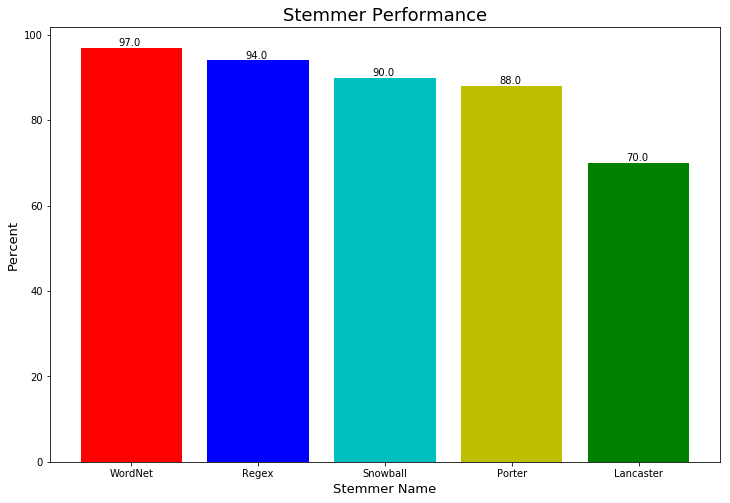

In [5]:
wordWrong = 2
regxWrong = 4
portWrong = 8
snobWrong = 7
lancWrong = 20

wordPerct = round(1-(wordWrong/len(wsWords)),2)*100
regxPerct = round(1-(regxWrong/len(rsWords)),2)*100
portPerct = round(1-(portWrong/len(psWords)),2)*100
snobPerct = round(1-(snobWrong/len(ssWords)),2)*100
lancPerct = round(1-(lancWrong/len(lsWords)),2)*100

stemPercList = [wordPerct, regxPerct, snobPerct, portPerct, lancPerct]
stemmers = ['WordNet', 'Regex', 'Snowball', 'Porter','Lancaster']
colors =['r','b','c','y','g']
plt.figure(figsize=(12,8))
plt.bar(stemmers, height=stemPercList, color=colors)
plt.title('Stemmer Performance',fontsize=18)
plt.xlabel('Stemmer Name', fontsize=13)
plt.ylabel('Percent', fontsize=13)
for i, v in enumerate(stemPercList):
    plt.text(i-.1 , v+.5, str(v), color='black')
plt.show()

# Homework 4
### Question 1

1.	Run one of the part-of-speech (POS) taggers available in Python. 
 *	Find the longest sentence you can, longer than 10 words, that the POS tagger tags correctly. Show the input and output.
 *	Find the shortest sentence you can, shorter than 10 words, that the POS tagger fails to tag 100 percent correctly. Show the input and output. Explain your conjecture as to why the tagger might have been less than perfect with this sentence.


In [6]:
longSentence = 'I was going to the park today and I found an old friend \
whom I had not seen in ten years.'
shortSentence = 'He ran the forty in 8.3 seconds'
tokens = nltk.word_tokenize(longSentence)
#tagged_sent = nltk.pos_tag(tokens, tagset='universal')
taggedLongSent= tag(longSentence)
taggedShortSent = tag(shortSentence)
print('Original long sentence:')
print('-----------------------')
print(longSentence,'\n')
print('POS tagged sentence:')
print('--------------------')
print(taggedLongSent,'\n')

print('Original short sentence:')
print('-----------------------')
print(shortSentence,'\n')
print('POS tagged sentence:')
print('--------------------')
print(taggedShortSent,'\n')


Original long sentence:
-----------------------
I was going to the park today and I found an old friend whom I had not seen in ten years. 

POS tagged sentence:
--------------------
[('I', 'PRP'), ('was', 'VBD'), ('going', 'VBG'), ('to', 'TO'), ('the', 'DT'), ('park', 'NN'), ('today', 'NN'), ('and', 'CC'), ('I', 'PRP'), ('found', 'VBD'), ('an', 'DT'), ('old', 'JJ'), ('friend', 'NN'), ('whom', 'WP'), ('I', 'PRP'), ('had', 'VBD'), ('not', 'RB'), ('seen', 'VBN'), ('in', 'IN'), ('ten', 'CD'), ('years', 'NNS'), ('.', '.')] 

Original short sentence:
-----------------------
He ran the forty in 8.3 seconds 

POS tagged sentence:
--------------------
[('He', 'PRP'), ('ran', 'VBD'), ('the', 'DT'), ('forty', 'CD'), ('in', 'IN'), ('8.3', 'CD'), ('seconds', 'NNS')] 



### Question 1 response
We can see that the long sentence is tagged correctly.  This sentence, although long, is grammaticaly simple. The second sentence uses what may be considered a slang term.  In this sense **the forty** is a noun referring to forty yard dash used to measure speed of football players.  But the POS tagger picked it up as a cardinal number. This is most likely because the POS tagger is only looking at words, and not understanding the context they are used in.

### Question 2 
2.	Run a different POS tagger in Python. Process the same two sentences from question 1.
 *	Does it produce the same or different output?
 *	Explain any differences as best you can.


In [7]:
longTokens = nltk.word_tokenize(longSentence)
shortTokens = nltk.word_tokenize(shortSentence)
newLongSentTagged = nltk.pos_tag(longTokens, tagset = 'universal')
newShortSentTagged = nltk.pos_tag(shortTokens, tagset = 'universal')

print('Original long sentence:')
print('-----------------------')
print(longSentence,'\n')
print('POS tagged sentence:')
print('--------------------')
print(newLongSentTagged,'\n')

print('Original short sentence:')
print('-----------------------')
print(shortSentence,'\n')
print('POS tagged sentence:')
print('--------------------')
print(newShortSentTagged,'\n')


Original long sentence:
-----------------------
I was going to the park today and I found an old friend whom I had not seen in ten years. 

POS tagged sentence:
--------------------
[('I', 'PRON'), ('was', 'VERB'), ('going', 'VERB'), ('to', 'PRT'), ('the', 'DET'), ('park', 'NOUN'), ('today', 'NOUN'), ('and', 'CONJ'), ('I', 'PRON'), ('found', 'VERB'), ('an', 'DET'), ('old', 'ADJ'), ('friend', 'NOUN'), ('whom', 'PRON'), ('I', 'PRON'), ('had', 'VERB'), ('not', 'ADV'), ('seen', 'VERB'), ('in', 'ADP'), ('ten', 'NUM'), ('years', 'NOUN'), ('.', '.')] 

Original short sentence:
-----------------------
He ran the forty in 8.3 seconds 

POS tagged sentence:
--------------------
[('He', 'PRON'), ('ran', 'VERB'), ('the', 'DET'), ('forty', 'NOUN'), ('in', 'ADP'), ('8.3', 'NUM'), ('seconds', 'NOUN')] 



### Question 2 response
The long sentence is still parsed correctly, but this time the nltk POS parser identified the word **forty** correctly as a noun. This is interesting because in the long sentence the word **ten** was correctnly identified as number. This may be because some of the words surrounding **ten** such as the word **years** give it away.

### Question 3
3.	In a news article from this week’s news, find a random sentence of at least 10 words.
 *	Looking at the Penn tag set, manually POS tag the sentence yourself.
 *	Now run the same sentences through both taggers that you implemented for questions 1 and 2. Did either of the taggers produce the same results as you had created manually?
 *	Explain any differences between the two taggers and your manual tagging as much as you can.
 
 #### Part 1
 Sentence from the news<br>
 "The measure would block the President from accessing some funds to construct a wall on the southern border." <br>
 Below is my attempt at manually POS tagging this sentence.<br><br>
 The(DT) measure(NN) would(MD) block(VB) the(DT) President(NNP) from(IN) accessing(VBG) some(JJ) funds(NNS) to (TO) <br>
 construct(VB) a(DT) wall(NN) on(IN) the(DT) southern(JJ) border(NN).


In [8]:
newsSentence = "The measure would block the President from accessing some \
funds to construct a wall on the southern border."
newsTokens = nltk.word_tokenize(newsSentence)
newsTaggedNLTK = nltk.pos_tag(newsTokens, tagset = 'universal')
newsTagged =  tag(newsSentence)
print('Original news sentence:')
print('-----------------------')
print(newsSentence,'\n')
print('nltk POS tagged sentence:')
print('-------------------------')
print(newsTaggedNLTK,'\n')
print('Penn POS tagged sentence:')
print('-------------------------')
print(newsTagged)

Original news sentence:
-----------------------
The measure would block the President from accessing some funds to construct a wall on the southern border. 

nltk POS tagged sentence:
-------------------------
[('The', 'DET'), ('measure', 'NOUN'), ('would', 'VERB'), ('block', 'VERB'), ('the', 'DET'), ('President', 'NOUN'), ('from', 'ADP'), ('accessing', 'VERB'), ('some', 'DET'), ('funds', 'NOUN'), ('to', 'PRT'), ('construct', 'VERB'), ('a', 'DET'), ('wall', 'NOUN'), ('on', 'ADP'), ('the', 'DET'), ('southern', 'ADJ'), ('border', 'NOUN'), ('.', '.')] 

Penn POS tagged sentence:
-------------------------
[('The', 'DT'), ('measure', 'NN'), ('would', 'MD'), ('block', 'VB'), ('the', 'DT'), ('President', 'NNP'), ('from', 'IN'), ('accessing', 'VBG'), ('some', 'DT'), ('funds', 'NNS'), ('to', 'TO'), ('construct', 'VB'), ('a', 'DT'), ('wall', 'NN'), ('on', 'IN'), ('the', 'DT'), ('southern', 'JJ'), ('border', 'NN'), ('.', '.')]


#### Part 2 & 3
The *NLTK* tagger uses a simpler form of tagging and doesn't seem to have as many categories as the *pattern* POS parser. For example the words **measure** and **President** are both identifed as *NOUN* by the  *NLTK* tagger, but the the *pattern* tagger differentiates between a singular noun and a proper noun.  My manual tagging did a good job compared to the *patter* tagger because I used the *Penn Treebank* parts of speech tags to find the more descriptive tags.